<div style="background-color:#044389; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:#FCFF4B">Machine Learning - Opdracht 2</h1>
<b style="color:black">Tim Oosterling, Rogier Gernaat & Natasja de Kok</b>
    </div>

### Importeren van de libraries & Maken van de dataframe

In [1]:
#importeren van libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from scipy.fft import fft, ifft
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from math import sqrt
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
display(train,test)

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,0,1,0.32,0.3485,0.66,0.0000,377
16633,2012-11-30 20:00:00,0,1,0.32,0.3485,0.66,0.0000,245
16634,2012-11-30 21:00:00,0,1,0.30,0.3182,0.75,0.0896,183
16635,2012-11-30 22:00:00,0,1,0.30,0.3333,0.75,0.0000,163


,date_hour,holiday,weathersit,temp,atemp,hum,windspeed
0,2012-12-01 00:00:00,0,1,0.26,0.3030,0.81,0.0000
1,2012-12-01 01:00:00,0,1,0.26,0.3030,0.81,0.0000
2,2012-12-01 02:00:00,0,2,0.26,0.3030,0.81,0.0000
3,2012-12-01 03:00:00,0,2,0.26,0.2727,0.81,0.1343
4,2012-12-01 04:00:00,0,1,0.26,0.2879,0.81,0.0896
...,...,...,...,...,...,...,...
451,2012-12-19 19:00:00,0,1,0.38,0.3939,0.50,0.3881
452,2012-12-19 20:00:00,0,1,0.36,0.3485,0.57,0.2239
453,2012-12-19 21:00:00,0,1,0.34,0.3182,0.61,0.2239
454,2012-12-19 22:00:00,0,1,0.34,0.3485,0.61,0.0896


In [3]:
sarima_train = train.copy()
sarima_test = train.copy()

#EDA

##### Om machine learning met Scikit-Learn te kunnen toepassen, zijn er 3 belangrijke vereisten:

#### Een dataframe:
De gegevens moeten georganiseerd zijn in de vorm van een dataframe, waarbij elke rij een datapunt vertegenwoordigt en elke kolom een functie (feature) of de targetvariabele bevat.

#### Numerieke waarden:
De dataset moet voornamelijk numerieke waarden bevatten, omdat Scikit-Learn met numerieke gegevens werkt. Als bepaalde data bestaat uit andere types, dan moeten zij worden omgezet naar numerieke waarden voordat Scikit er iets mee kan doen.

#### Niet te veel ontbrekende waarden:
Zorg ervoor dat de dataset niet veel ontbrekende waarden bevat, of dat je een strategie hebt om deze waarden aan te pakken, zoals invullen of verwijderen.





In [4]:
#Checken of de data in een Pandas DataFrame staat
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [5]:
#Checken of alle waardes integers of floats zijn
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_hour   16637 non-null  object 
 1   holiday     16637 non-null  int64  
 2   weathersit  16637 non-null  int64  
 3   temp        16637 non-null  float64
 4   atemp       16637 non-null  float64
 5   hum         16637 non-null  float64
 6   windspeed   16637 non-null  float64
 7   cnt         16637 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.0+ MB


Hier zien we dat de kolom Date time een "Object" Data type heeft

In [6]:
#check missende waarden
print(train.isnull().sum())

date_hour     0
holiday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [7]:
# for col in train.columns:
#   print(f"{col}\n{train[col].value_counts()}\n {100  * '*'}")

Kijkend naar de data hebben we geen missende waardes die we moeten verwerken

### Kolom uitleg

- datetime: hourly date + timestamp  
- season: Welk seizoen het is
  - 1: Lente
  - 2: Zomer
  - 3: Hefst
  - 4: Winter
- holiday: Of het een feest dag is of niet
  - '0' geen feestdag
  - '1' wel een feestdag
- workingday: Als de dag geen feestdag of weekend is. Een niet vrije dag
- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Temperatuur in Celsius
- atemp: "Gevoels Temperatuur" in Celcius
- hum (Humidity): De relatieve vochtigheid
- windspeed: Windsnelheid
- cnt (count): Totaal verhuuraantallen


##Hier gaan we kijken hoe de data is verdeeld

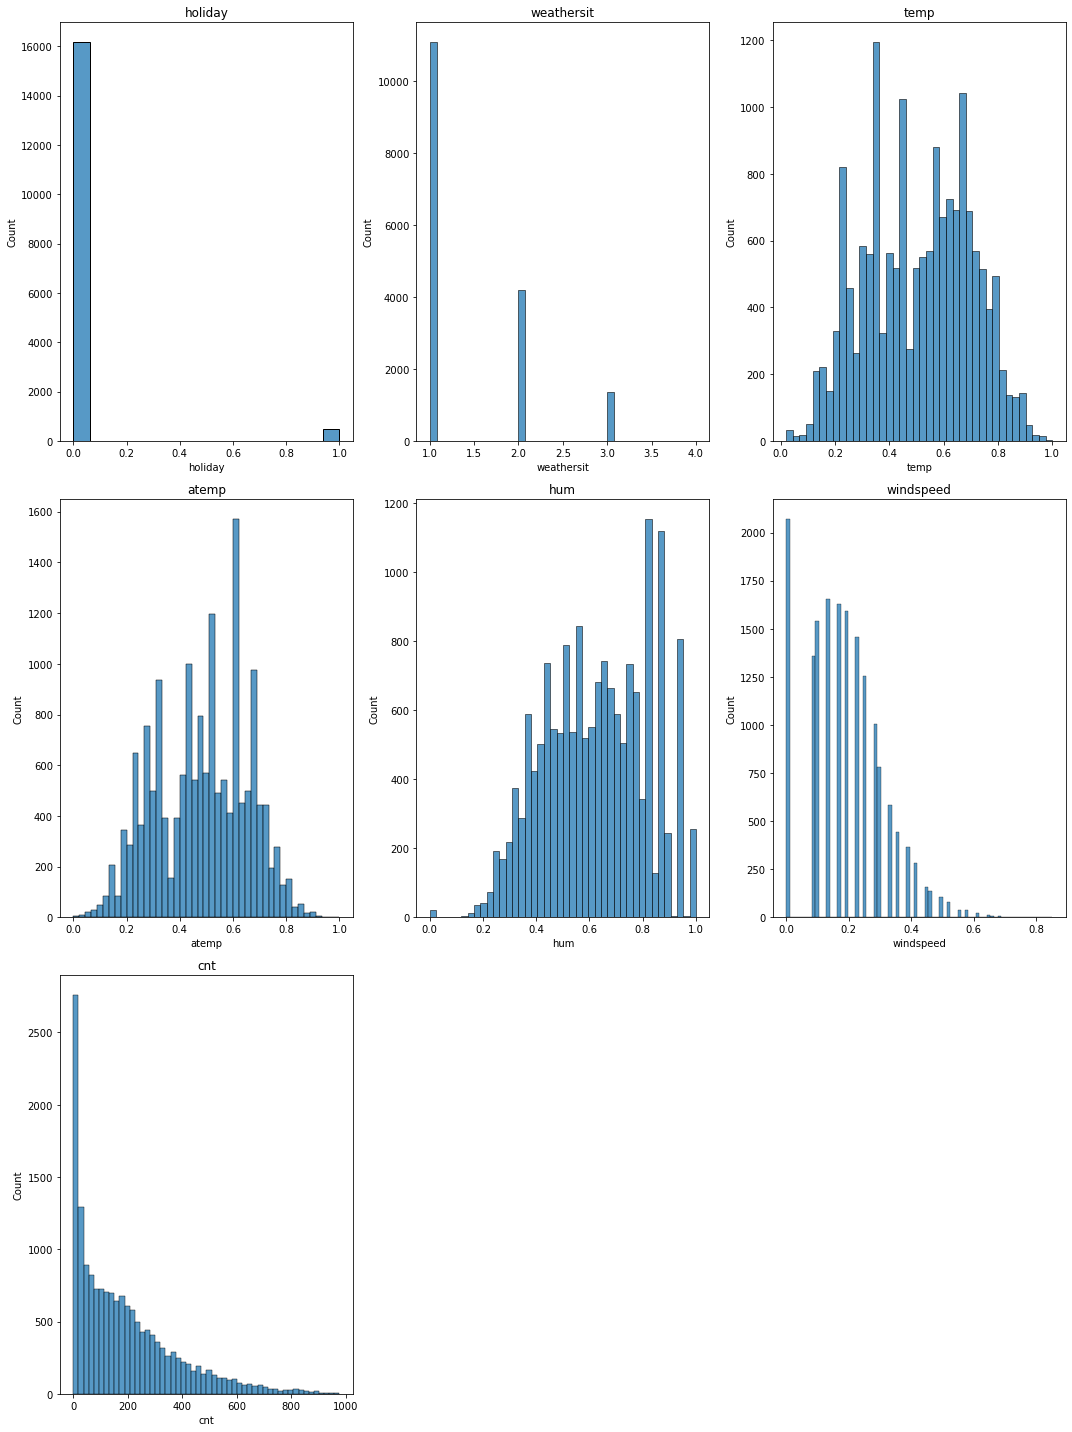

In [8]:
# 3 bij 3 grid voor de plots
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
axes = axes.ravel()

#Maakt de grid voor 9 cellen, de "1:" slaat de eerste kolom over omdat we deze niet willen gebruiken
for idx, col in enumerate(train.columns[1:]):
    sns.histplot(train[col], ax=axes[idx])
    axes[idx].set_title(col)

#Dit haalt de 2 lege cellen weg
axes[-2].axis('off')
axes[-1].axis('off')

plt.tight_layout()
plt.show()


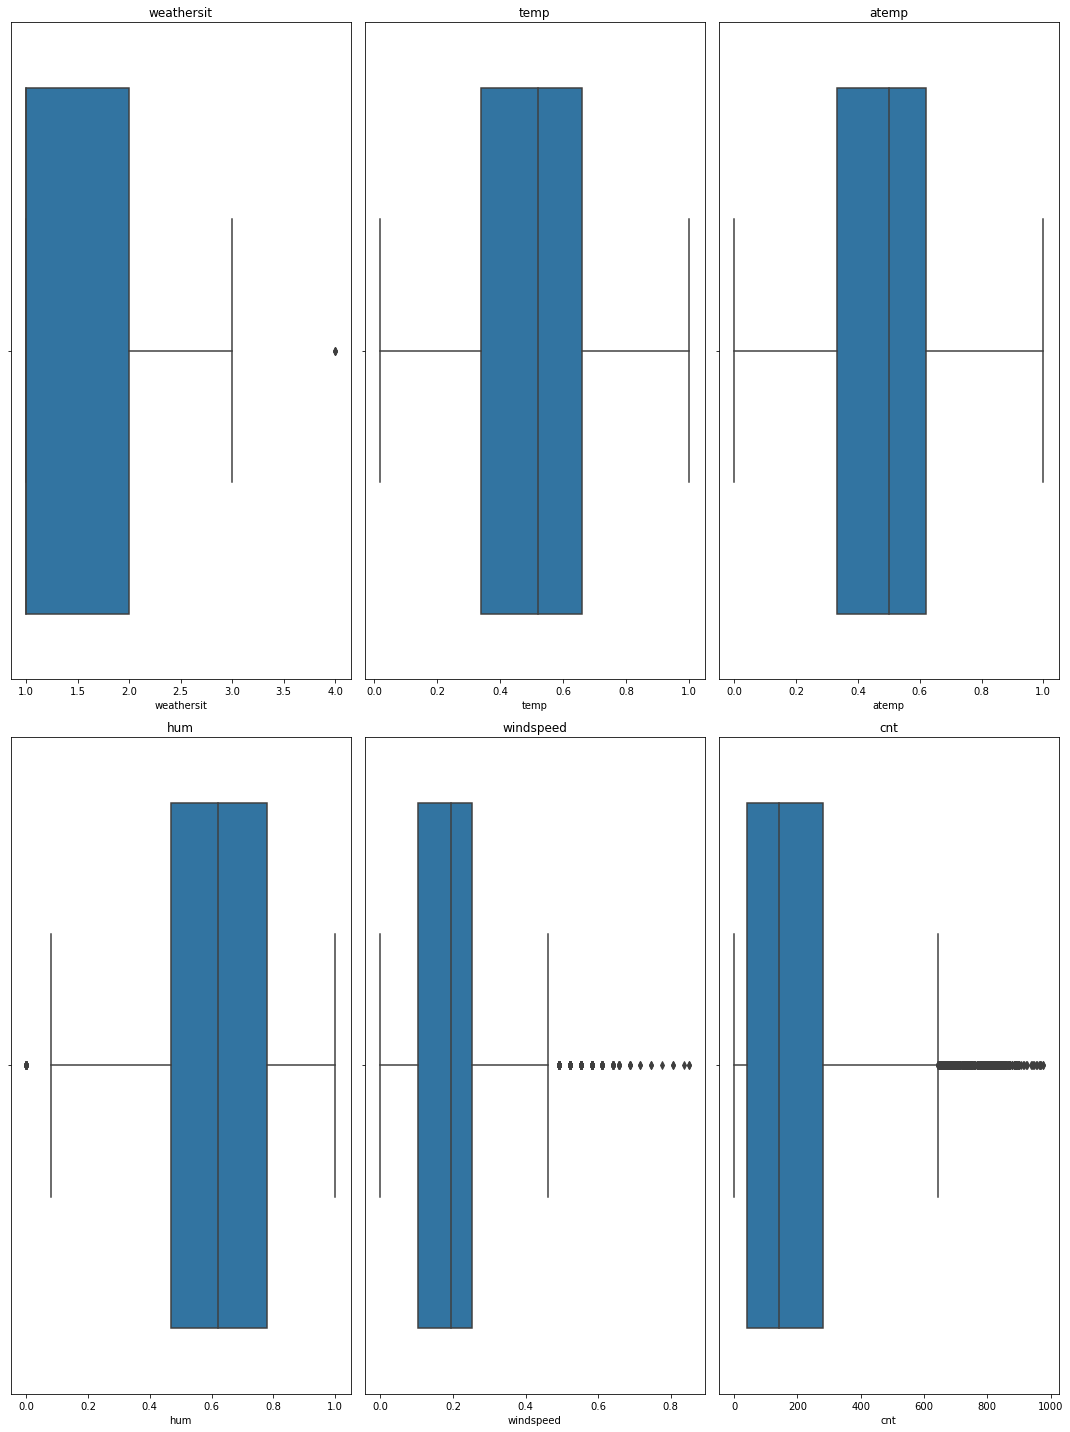

In [9]:
# 3 bij 2 grid voor de plots
fig, axes = plt.subplots(2, 3, figsize=(15, 20))
axes = axes.ravel()

#Maakt de grid voor 9 cellen, de "2:" slaat de eerste  2 kolommen over omdat we deze niet willen gebruiken
for idx, col in enumerate(train.columns[2:]):
    sns.boxplot(train[col], ax=axes[idx])
    axes[idx].set_title(col)

plt.tight_layout()
plt.show()


Hierbij zien we veel outliers bij "WindSpeed" en "cnt"


## Kijken naar de correlaties tussend de kolommen

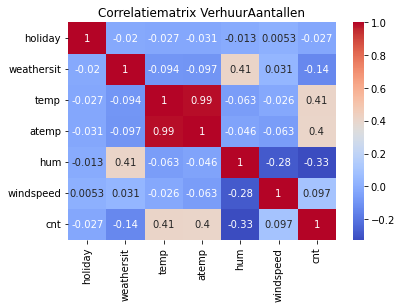

In [10]:
# Bereken de correlatiematrix
corr_matrix = train.corr()
# Plot de correlatiematrix als een heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlatiematrix VerhuurAantallen')
plt.show()

Hier zien we alleen een sterke correlatie tussen "Temp" en "ATemp". Dit is vrij logisch sinds de "Werkelijke Temperatuur" altijd rond de "Gevoels Temperatuur" ligt. Verder zien we nog een paar kleine correlaties tussen kolommen van "0.4-0.41" alleen geen echt sterke positieve correlatie

Bij humidity is er een sterke negetieve correlatie met het aantal gehuurde fietsen.

In [11]:
# Relatie temperatuur en verhuurde aantal fietsen

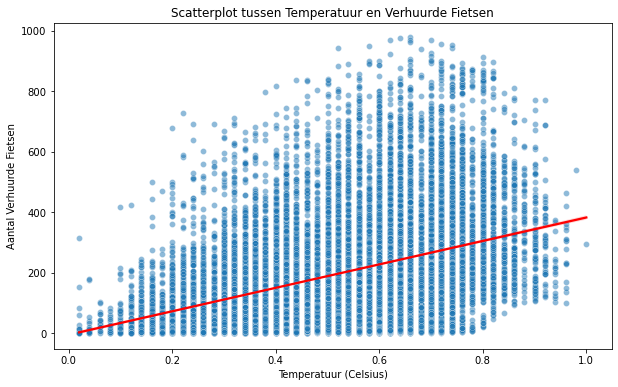

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=train, alpha=0.5)
sns.regplot(x='temp', y='cnt', data=train, color='red', scatter=False)
plt.title('Scatterplot tussen Temperatuur en Verhuurde Fietsen')
plt.xlabel('Temperatuur (Celsius)')
plt.ylabel('Aantal Verhuurde Fietsen')
plt.show()

In [13]:
# Tijdreeksplot verhuurde fietsen

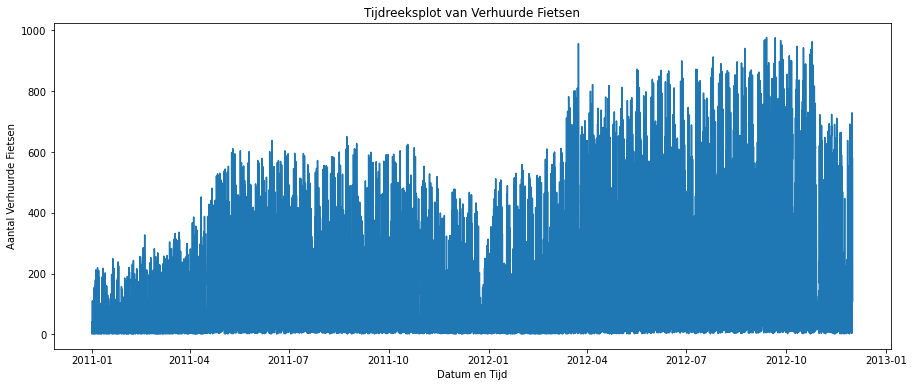

In [14]:
train['date_hour'] = pd.to_datetime(train['date_hour'])

train = train.sort_values(by='date_hour')

plt.figure(figsize=(15, 6))
sns.lineplot(x='date_hour', y='cnt', data=train, palette='viridis')
plt.title('Tijdreeksplot van Verhuurde Fietsen')
plt.xlabel('Datum en Tijd')
plt.ylabel('Aantal Verhuurde Fietsen')
plt.show()


In [15]:
def df_aanpassen(df):
    df2 = df.copy()
    df2['tijd'] = pd.to_datetime(df2['date_hour'])

    df2["jaar"] = df2['tijd'].dt.year
    df2["maand"] = df2['tijd'].dt.month
    df2["uur"] = df2['tijd'].dt.hour
    df2['dayofweek'] = df2['tijd'].dt.dayofweek

    maand_naar_seizoen = {1: 'winter', 2: 'lente', 3: 'lente', 4: 'lente', 5: 'zomer', 6: 'zomer', 7: 'zomer', 8: 'herfst', 9: 'herfst', 10: 'herfst', 11: 'winter', 12: 'winter'}
    dayofweek = {0: 'maandag', 1: 'dinsdag', 2: 'woensdag', 3: 'donderdag', 4: 'vrijdag', 5: 'zaterdag', 6: 'zondag'}
    weathersit = {1: 'helder', 2: 'mist', 3: 'neerslag', 4: 'heftige neerslag'}

    df2['seizoen'] = [maand_naar_seizoen[maand] for maand in df2['maand']]
    df2['dag_vd_week'] = [dayofweek[dag] for dag in df2['dayofweek']]
    df2['weer'] = [weathersit[wsit] for wsit in df2['weathersit']]

    df2 = df2.drop(['dayofweek', 'weathersit', 'tijd'], axis=1)
    df2 = df2.set_index('date_hour')

    return df2

In [16]:
train = df_aanpassen(train)
test = df_aanpassen(test)

display(test)
display(train)

,holiday,temp,atemp,hum,windspeed,jaar,maand,uur,seizoen,dag_vd_week,weer
date_hour,,,,,,,,,,,
2012-12-01 00:00:00,0,0.26,0.3030,0.81,0.0000,2012,12,0,winter,zaterdag,helder
2012-12-01 01:00:00,0,0.26,0.3030,0.81,0.0000,2012,12,1,winter,zaterdag,helder
2012-12-01 02:00:00,0,0.26,0.3030,0.81,0.0000,2012,12,2,winter,zaterdag,mist
2012-12-01 03:00:00,0,0.26,0.2727,0.81,0.1343,2012,12,3,winter,zaterdag,mist
2012-12-01 04:00:00,0,0.26,0.2879,0.81,0.0896,2012,12,4,winter,zaterdag,helder
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,0,0.38,0.3939,0.50,0.3881,2012,12,19,winter,woensdag,helder
2012-12-19 20:00:00,0,0.36,0.3485,0.57,0.2239,2012,12,20,winter,woensdag,helder
2012-12-19 21:00:00,0,0.34,0.3182,0.61,0.2239,2012,12,21,winter,woensdag,helder


,holiday,temp,atemp,hum,windspeed,cnt,jaar,maand,uur,seizoen,dag_vd_week,weer
date_hour,,,,,,,,,,,,
2011-01-01 00:00:00,0,0.24,0.2879,0.81,0.0000,16,2011,1,0,winter,zaterdag,helder
2011-01-01 01:00:00,0,0.22,0.2727,0.80,0.0000,40,2011,1,1,winter,zaterdag,helder
2011-01-01 02:00:00,0,0.22,0.2727,0.80,0.0000,32,2011,1,2,winter,zaterdag,helder
2011-01-01 03:00:00,0,0.24,0.2879,0.75,0.0000,13,2011,1,3,winter,zaterdag,helder
2011-01-01 04:00:00,0,0.24,0.2879,0.75,0.0000,1,2011,1,4,winter,zaterdag,helder
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-11-30 19:00:00,0,0.32,0.3485,0.66,0.0000,377,2012,11,19,winter,vrijdag,helder
2012-11-30 20:00:00,0,0.32,0.3485,0.66,0.0000,245,2012,11,20,winter,vrijdag,helder
2012-11-30 21:00:00,0,0.30,0.3182,0.75,0.0896,183,2012,11,21,winter,vrijdag,helder


<AxesSubplot:xlabel='uur', ylabel='cnt'>

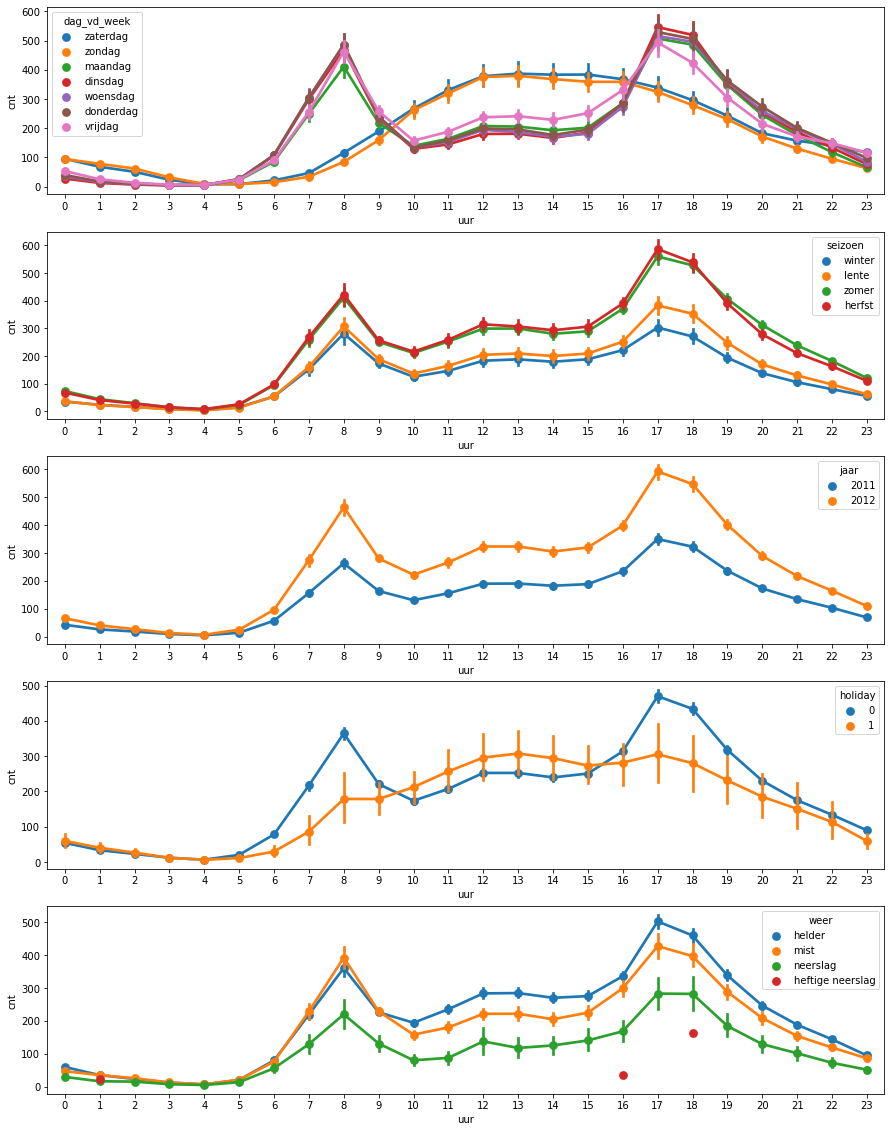

In [17]:
figure, axes = plt.subplots(nrows=5, figsize=(15, 20))
sns.pointplot(x = 'uur', y = 'cnt', data = train, hue = 'dag_vd_week', ax = axes[0])
sns.pointplot(x = 'uur', y = 'cnt', data = train, hue = 'seizoen', ax = axes[1])
sns.pointplot(x = 'uur', y = 'cnt', data = train, hue = 'jaar', ax = axes[2])
sns.pointplot(x = 'uur', y = 'cnt', data = train, hue = 'holiday', ax = axes[3])
sns.pointplot(x = 'uur', y = 'cnt', data = train, hue = 'weer', ax = axes[4])

 We hebben vijf sets gegevens geplot, waarbij het aantal verhuurde fietsen op de y-as staat en het tijdstip op de x-as. In de eerste grafiek hebben we de dagen van de week geplot. We zien een opvallend patroon dat het weekend in vergelijking met andere dagen erg afwijkt. Op een doordeweekse dag is er duidelijk een ochtend- en avondpiek te zien rond 8:00, 17:00 en 18:00 uur. Daarnaast valt op dat er op maandagochtend en vrijdagavond minder fietsen worden verhuurd.

Voor het tweede plot hebben we gekozen om seizoenen te gebruiken, aangezien het verschil tussen de maanden niet goed zichtbaar was toen we alle 12 maanden in één plot weergaven. We zien aanzienlijke verschillen tussen de seizoenen, vooral tijdens de avondpiek.

Het derde plot behandelt een nog grotere tijdsperiode, namelijk jaren. Hieruit blijkt dat er in 2012 aanzienlijk meer fietsen zijn verhuurd dan in 2011.

In het vierde plot hebben we onderzocht of vakanties invloed hebben op de verhuurcijfers, en dat blijkt zo te zijn. Op een vakantiedag huren meer mensen fietsen in de middaguren, maar minder tijdens de ochtend- en avondpiek.

Tenslotte hebben we onderzocht of het weer mensen weerhoudt om fietsen te huren, en het korte antwoord is ja. Hoe slechter het weer, hoe minder fietsen er worden verhuurd.

Tussen al deze gegevens zitten duidelijke verscillen daarom kunnen we het goed gebruiken on onze modellen te trainen.



 De verticale lijnen door de datapunten staan voor residuals, hieronder een plotje en kleine uitleg

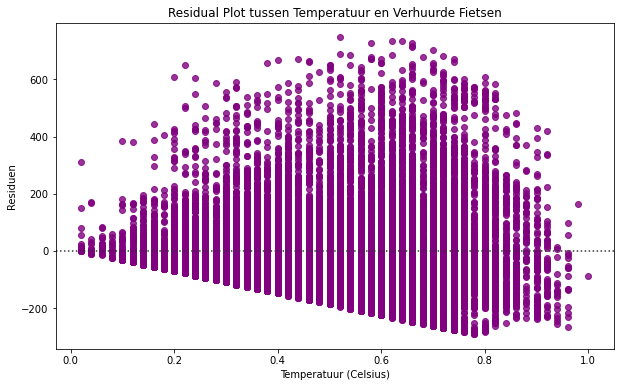

In [18]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='temp', y='cnt', data=train, color='purple')

plt.title('Residual Plot tussen Temperatuur en Verhuurde Fietsen')
plt.xlabel('Temperatuur (Celsius)')
plt.ylabel('Residuen')

plt.show()


Uitleg:  https://chat.openai.com/share/5a5fd51f-010e-44f8-8dc9-681a985eaa85

# Opdracht 2 Feature Engineering

In [19]:
zero_list = []
for i in range(456):
    zero_list.append(99999)

test['cnt'] = zero_list

temp = pd.concat([train, test], axis=0, ignore_index=False)

temp = pd.get_dummies(temp,columns=['jaar'],prefix = 'jaar')
temp = pd.get_dummies(temp,columns=['maand'],prefix = 'maand')
temp = pd.get_dummies(temp,columns=['uur'],prefix = 'uur')
temp = pd.get_dummies(temp,columns=['dag_vd_week'])
temp = pd.get_dummies(temp,columns=['weer'])
temp = pd.get_dummies(temp,columns=['seizoen'])


kaggle = temp[temp['cnt'] == 99999]
kaggle = kaggle.drop('cnt', axis=1)

df  = temp[temp['cnt'] != 99999]
y = df['cnt']
X = df.drop(['cnt'], axis=1)
X.head()

,holiday,temp,atemp,hum,windspeed,jaar_2011,jaar_2012,maand_1,maand_2,maand_3,...,dag_vd_week_zaterdag,dag_vd_week_zondag,weer_heftige neerslag,weer_helder,weer_mist,weer_neerslag,seizoen_herfst,seizoen_lente,seizoen_winter,seizoen_zomer
date_hour,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0.24,0.2879,0.81,0.0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2011-01-01 01:00:00,0,0.22,0.2727,0.80,0.0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2011-01-01 02:00:00,0,0.22,0.2727,0.80,0.0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2011-01-01 03:00:00,0,0.24,0.2879,0.75,0.0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2011-01-01 04:00:00,0,0.24,0.2879,0.75,0.0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=21*24, shuffle=False)


In [21]:
def dataset_testen(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    y_train_pred = lr.predict(X_train)
    print(f'Linear Regression, train: {round(np.sqrt(mean_squared_error(y_train, y_train_pred)),3)} test: {round(np.sqrt(mean_squared_error(y_test, y_test_pred)),3)}')

    dt = DecisionTreeRegressor(max_depth=12)
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    print(f'Decision Tree Regressor, train: {round(np.sqrt(mean_squared_error(y_train, y_train_pred)),3)} test: {round(np.sqrt(mean_squared_error(y_test, y_test_pred)),3)}')

    rf = RandomForestRegressor(max_depth=12)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    print(f'Random Forest Regressor, train: {round(np.sqrt(mean_squared_error(y_train, y_train_pred)),3)} test: {round(np.sqrt(mean_squared_error(y_test, y_test_pred)),3)}')

    importances_df = pd.DataFrame(rf.feature_importances_, index = X_train.columns).sort_values(0, ascending=False)
    plt.figure(figsize=(10, 8))
    sns.heatmap(importances_df.iloc[:20,:])
    plt.title('Top 20 Feature Importances')
    plt.show()

Met de functie dataset_testen kunnen wij de dataset testen op simpele models om te kijken of er verbetering in zit.

Linear Regression, train: 101.432 test: 114.046
Decision Tree Regressor, train: 78.163 test: 118.926
Random Forest Regressor, train: 68.346 test: 109.761


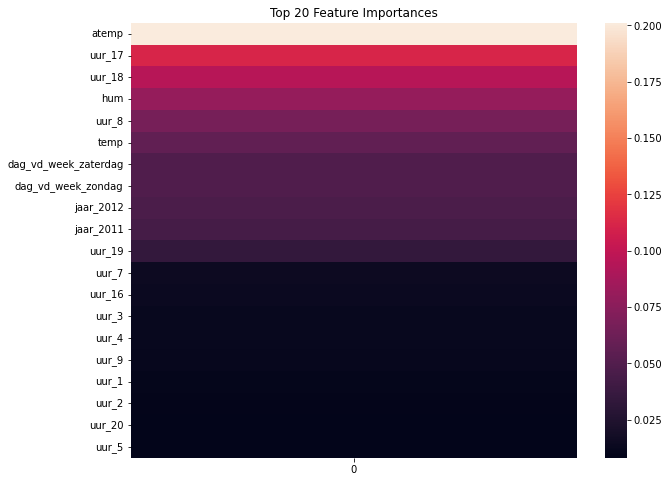

In [22]:
dataset_testen(X_train, X_test, y_train, y_test)

uitleg resultaten

Linear Regression, train: 101.416 test: 114.61
Decision Tree Regressor, train: 76.453 test: 139.642
Random Forest Regressor, train: 65.818 test: 104.84


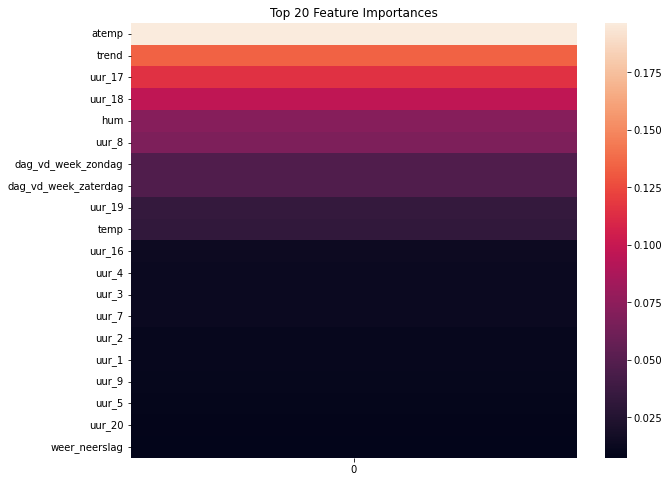

In [23]:
dp = DeterministicProcess(index=y_train.index, constant=False, order=1, drop=True)
X_train2 = dp.in_sample()
X_test2 = dp.out_of_sample(steps=len(y_test))
X_test2 = X_test2.set_index(X_test.index)

X_train_trend = pd.concat([X_train, X_train2], axis=1)
X_test_trend = pd.concat([X_test, X_test2], axis=1)

dataset_testen(X_train_trend, X_test_trend, y_train, y_test)

# Opdracht 3: Modelleren

### Random Forest Regressor
Random Forest Regressor is een machine learning-model dat gebaseerd is op de pricipes van ensemble learning. Het maakt namelijk gebruik van een ensemble(verzameling) van DecisionTrees om nauwkeurige voorspellingen te maken voor regressie problemen. Het model heet "Random Forest" door de willekeurige selectie van features en het toepassen van "Bagging" om verschillen te creëren tussen de bomen.

De bouwstenen van dit model zijn de DecisionTrees. DecisionTree is een boomactige structuur waarbij bij elke node en beslissing word gemaakt op basis van de features. Deze features en bij behorende beslissing zijn bedoeld om de gegevens te splitsen in meerdere subsets. Dit process blijft zichzelf herhalen totdat het model zijn eindpunt bereikt dit gebeurd bijvoorbeeld bij het bereiken van de max_depth of het aantal data punten in de "leaf" en daar word dan op de "leaf" een voorspelling gedaan

Bagging is een belangrijk onderdeel van het Random Forest Regressie. Het begint met het creëren van meerdere subsets van de trainings data doormiddel van bootstrap sampling. Dit betekent dat voor elke subset willekeurig met datapunten uit de originele trainingsset worden geplukt. En Vervolgens wordt voor elke bootstrap sample een afzonderlijke Decision Tree getraind. Het bijzondere aan bagging is dat het modelleert door middel van verschillende 'meningen' van individuele modellen. Waardoor het model robuuster wordt en beter kan zoeken naar nieuwe, niet-geziene gegevens.

De willekeurige selectie van features tijdens het trainen van de Decision Trees draagt ook bij aan de diversiteit van de bomen in de ensemble. Dit verhoogt de robuustheid van het Random Forest-model, waardoor het beter bestand is tegen overfitting en nauwkeurigere voorspellingen kan doen.


In [24]:

def random_forest(X_train, y_train, X_test, y_test):
    rfc = RandomForestRegressor(random_state=42)

    #Maakt de paramgrid voor gridsearch om te zoeken voor de optimale parameters
    param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

    #Maakt de Gridsearch crossfold validation
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    CV_rfc.fit(X_train, y_train)
    print(CV_rfc.best_params_)

    #Maakt y_pred zodat we de RMSE en MSE kunnen berekenen
    y_pred = CV_rfc.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse:.2f}')
    print(f'MSE: {mse: .2f}')

    #Plotje voor visualiseren
    plt.figure(figsize=(20, 6))
    plt.plot(y_test.values, label='y_test', marker='o')
    plt.plot(y_pred, label='y_pred', marker='o')
    plt.title('y_test vs y_pred')
    plt.xlabel('Data Point')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RMSE: 172.67
MSE:  29815.01


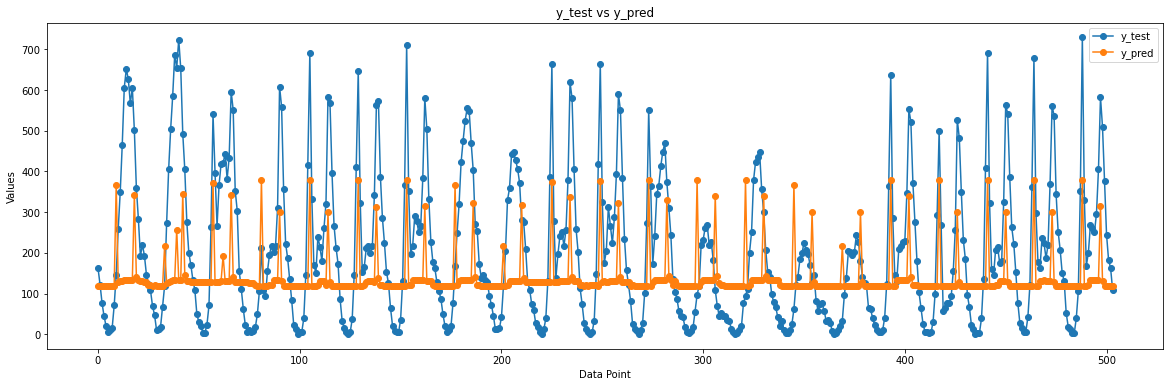

In [25]:
random_forest(X_train, y_train, X_test, y_test)


### Ensemble
Definitie EDA De theorie van Ensemble learning is dat het een procedure is die gebruikt maakt van meerdere leermachines, door deze leermachines als een comité van besluitvormers te behandelen en hun individuele output te combineren. Het idee erachter is dat de beslissing van het comité als geheel, waarbij individuele voorspellingen worden gecombineerd, gemiddeld een hogere mate van nauwkeurigheid zou moeten hebben dan comitéleden afzonderlijk (Brown, G.). In de context van machine learning houdt een “Ensemble” in dat er verschillende machine learning-modellen worden gecombineerd tot één voorspellend model. De gecombineerde kracht van de modellen compenseert individuele variances en biases van de modellen. Door een samengestelde voorspelling is de nauwkeurigheid van de voorspelling beter dan bij de individuele modellen afzonderlijk.

Hard voting vs soft voting Bij Ensemble learning moet er de keuze worden gemaakt uit twee soorten van stemmingen: hard voting en soft voting. Hard voting betekent dat je de de stemmen die de onderhavige modellen hebben gegeven bij elkaar optelt en zo de kant laat winnen dat de meeste stemmen krijgt. Soft voting houdt in dat de voorspelde kansen voor de klassenlabels bij elkaar optelt en zo het klasselabel van de grootste kans voorspelt.    

In ons voorbeeld hier beneden maken we gebruik van Soft voting en om dit misschien nog een beetje te verduidelijken hier een klein voorbeeld met de 3 modellen die we hier toepassen (hierbij gebruiken we niet de echte scores):

We gebruiken 3 modellen: RandomForestRegressor, GradientBoostingRegressor en LineareRegressie/RidgeRegressie. Stel je voor dat we de volgende uitkomsten krijgen
  - RandomForest: 75%
  - GradientBoosting: 54%
  - Ridge: 64%

Dan worden deze scores toegevoegd om de gemiddelde score te berekenen: (75 + 54 + 64)/3 = 64,3%. Hierbij hebben we dus de modellen laten samenwerken om betere voorspellingen te krijgen dan als de modellen los van elkaar zouden werken. Ookal zien we hier dus dat GradientBoosting een betere voorspelling doet dan de ensemble betekent dat niet persé dat het een slechter model is. De ensemble combineert de diverse inzichten van de modellen en het gemiddelde van de scores laat meer het collectieve begrip zien van de modellen

In [26]:
# Model 1: Random Forest Regressor
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc = RandomForestRegressor(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
rfc_bestparams = CV_rfc.best_params_
rfc_best = CV_rfc.best_estimator_

# Model 2: Gradient Boosting Regressor
param_grid_gbr = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gbr = GradientBoostingRegressor(random_state=42)
CV_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5)
CV_gbr.fit(X_train, y_train)
gbr_bestparams = CV_gbr.best_params_
gbr_best = CV_gbr.best_estimator_

# Model 3: Ridge Regressie
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge = Ridge()
CV_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5)
CV_ridge.fit(X_train, y_train)
ridge_bestparams = CV_ridge.best_params_
ridge_best = CV_ridge.best_estimator_

# Voorspellingen maken voor elk model
y_pred_rfr = rfc_best.predict(X_test)
y_pred_gbr = gbr_best.predict(X_test)
y_pred_ridge = ridge_best.predict(X_test)

# Gemiddelde van de voorspellingen berekenen, dit maakt de ensemble
ensemble_pred = (y_pred_rfr + y_pred_gbr + y_pred_ridge) / 3

# MSE en RMSE berekenen van de Ensemble
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(ensemble_mse)
print(f'Ensemble RMSE: {ensemble_rmse:.2f}')

# Vergelijken van de RMSE per model
print(f'Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rfr)):.2f}')
print(f'Gradient Boosting RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gbr)):.2f}')
print(f'Ridge Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}')

KeyboardInterrupt: 

In [ ]:
#Maakt een plotje voor elk van de predictions ten opzichte can de test data de volgorde is: Random Forest, Gradient Boosting, Ridge, Ensemble
for y_pred in [y_pred_rfr,y_pred_gbr,y_pred_ridge, ensemble_pred]:
    y_pred = y_pred
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse:.2f}')
    plt.figure(figsize=(20, 6))
    plt.plot(y_test.values, label='y_test', marker='o')
    plt.plot(y_pred, label='y_pred', marker='o')
    plt.title('y_test vs y_pred')
    plt.xlabel('Data Point')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

# Linear Regression

#### Lineaire formule
Linear regression is een techniek die kan worden gebruikt bij Machine Learning, waarbij de relatie tussen een onbekende (afhankelijke) variabele en een bekende (onafhankelijke) variabele worden gemodelleerd in een lineaire vergelijking. Voor het gemak noemen we de afhankelijke (onbekende) variabele y en de onafhankelijke (bekende) variabele noemen we x.
Het doel van linear regression is dat het verband terug wordt gebracht tot de volgende formule:

$y = ax + b$

$y$ = de afhankelijke (onbekende) variabele.

$a$ = de helling / steilheid van de lijn aan, oftewel hoezeer y relatief verandert als x verandert.  

$x$ = de onafhankelijke (bekende) variabele.

$b$ = de intercept, oftewel het snijpunt van de lijn met de y-as, wanneer x gelijk staat aan 0.

Om de prestatie van een regression-model te evalueren worden vaak evaluatiemaatstaven, zoals de R2-score, en loss-functies, zoals de Mean squared error en de R2-score gebruikt. Hieronder bespreken wij twee loss-functions, namelijk de Mean Squared Error en de Mean Absolute Error. Daarna bespreken wij de R2-score. Om het gevaar van overfitting te verminderen, kan regularisatie worden toegepast. Dit bespreken wij hieronder alvorens zij een simpel rekenvoorbeeld geven waarin de voornoemde begrippen allemaal de revue passeren.



#### Mean squared error
Mean Squared Error (MSE) en R²-score zijn beide evaluatiemaatstaven die worden gebruikt om de prestaties van een regressiemodel te meten.
De Mean Squared Error (MSE) kwadrateert voor elk datapunt de voorspelde waarden ($ŷ$) en de werkelijke waarden ($y$) en berekent het gemiddelde verschil tussen die twee. Dit is de formule:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

$n$ = het aantal datapunten.

$yi$ = de werkelijke waarde van de afhankelijke variabele voor datapunt ii.

$y^i$ = de voorspelde waarde van de afhankelijke variabele voor datapunt ii.

#### Mean absolute error
Het verschil tussen Mean Squared Error (MSE) en Mean Absolute Error (MAE) is dat MSE de gemiddelde kwadratische fout tussen voorspelde en werkelijke waarden meet, terwijl MAE de gemiddelde absolute fout meet, waardoor de MAE minder gevoelig wordt voor extreme waarden.
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

$n$ = het aantal datapunten.

$yi$ = de werkelijke waarde van de afhankelijke variabele voor datapunt ii.

$y^i$ = de voorspelde waarde van de afhankelijke variabele voor datapunt ii.

#### R²-score
De R²-score meet de variatie van de afhankelijke variabele y en levert een score op tussen de 0 en de 1. Een 1 geeft aan dat het model de variabiliteit van de data kan verklaren en 0 geeft aan dat het model de variabiliteit helemaal niet kan verklaren. Eigenlijk is de R²-score het kwadraat van de de correlatiecoëfficiënt tussen de werkelijke en voorspelde waarden. Een hogere R²-score geeft dus aan dat het model beter bij de data in kwestie past.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

$\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ = de som van de gekwadrateerde verschillen tussen de werkelijke waarden ($yi$) en de voorspelde waarden ($y^i$)

$\sum_{i=1}^{n} (y_i - \bar{y})^2$ =   een maat voor de totale variabiliteit in de werkelijke waarden $yi$
Om dit te berekenen, neem je voor elk datapunt ($yi$) het verschil tussen de werkelijke waarde en het gemiddelde $yˉ$, kwadrateer dat verschil, en tel al deze gekwadrateerde verschillen bij elkaar op.

$yi$ = de werkelijke waarden

$yˉ$ = het gemiddelde van de werkelijke waarden $yi$

### Regularisatie
https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer

https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer

L2-regularisatie, ook wel bekend als Ridge Regression, heeft als doel overfitting te verminderen. Overfitting is het verschijnsel dat een model te veel wordt aangepast aan de trainingsdata. Wanneer het model vervolgens probeert voorspellingen te doen op basis van nieuwe data, presteert het slecht omdat het alleen rekening heeft gehouden met de trainingsdata. L2-regularisatie voorkomt overfitting door de parameters in het model te verkleinen, waardoor het model minder gevoelig voor de trainingsdata. Dit wordt bereikt door de kwadraten van de parameters ($b_i ^2$) te sommeren en te vermenigvuldigen met een hyperparameter $\alpha_2$. Hoe groter de waarde van $\alpha_2$, hoe sterker de regularisatie, wat leidt tot kleinere parameterwaarden.

De formule voor L2-regularisatie is als volgt:

$L_2 = \alpha_2 \sum_{i=1}^{N} b_i ^2$

L1-regularisatie, ook wel bekend als Lasso Regression, heeft vergelijkbare eigenschappen als L2-regularisatie. Het belangrijkste verschil ligt echter in de manier waarop de parameters worden geregulariseerd. In plaats van de kwadraten van de parameters te gebruiken, maakt L1-regularisatie gebruik van de absolute waarden van de parameters ($|b_i|$). Hierdoor heeft Lasso Regression het interessante effect dat het sommige parameters volledig kan uitsluiten (ze worden gelijk aan nul) tijdens het trainen van het model. Dit is anders dan Ridge Regression, waarbij de parameters alleen worden verkleind maar niet naar nul worden gebracht.

Voor L1-regularisatie ziet de formule er als volgt uit:

$L_1 = \alpha_1 \sum_{i=1}^{N} |b_i|$

De keuze tussen L2- en L1-regularisatie hangt af van de eigenschappen van de dataset. L2-regularisatie wordt vaak gebruikt wanneer alle features min of meer even belangrijk zijn, terwijl L1-regularisatie nuttig kan zijn als er een vermoeden is dat slechts een deel van de features daadwerkelijk van invloed is op het model. Met L1-regularisatie kunnen coëfficienten op nul worden gezet. Hiermee kan een feature dus compleet worden verwijderd. Hierdoor kan het model zich kan concentreren op de meest relevante features voor voorspellingen.

### Resultaten
Mean Squared Error op testdata: 13029.429718501984
Root Mean Squared Error op testdata: 114.14652740448123
R²-score op testdata: 0.5991615593366035




In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model

def test_linear_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return y_pred, mse, r2

model = train_linear_regression(X_train, y_train)

y_pred, mse, r2 = test_linear_regression(model, X_test, y_test)

print(f"Mean Squared Error op testdata: {mse}")
print(f"R²-score op testdata: {r2}")


Mean Squared Error op testdata: 13006.404730902777
R²-score op testdata: 0.5998699019367754


# ANN


Een Artificial Neural Network (ANN) is een kunstmatige nabootsing van het menselijk brein, dat net als het menselijk brein structureel gezien verandert ten behoeve van bepaalde functionaliteiten. Hiertoe maakt het gebruik van chaostheorie en niet-lineaire dynamieken (Grossi, 2008, complete verwijzing: Grossi, E., & Buscema, M. (2008). Introduction to artificial neural networks. European Journal of Gastroenterology & Hepatology. Advance online publication. DOI: 10.1097/MEG.0b013e3282f198a0).


Met chaos-theorie wordt bedoeld dat verschillende waarden voor hyperparameters (grote )verschillen in uitkomsten kunnen genereren. In het geval van de onderstaande ANN-code gaat het daarbij om bijvoorbeeld de learning rate en het aantal verborgen lagen in de ANN.
Met niet-lineaire dynamica wordt bedoeld dat de gebruikte vergelijkingen complexer zijn dan de lineaire vorm aX + b, wat een zekere onvoorspelbaarheid teweeg brengt die echter niet willekeurig is (https://www.nature.com/subjects/nonlinear-dynamics ).


In deze code is vormt de ReLu activatiefunctie een simpele illustratie van non-lineairiteit in het ANN. Een ANN bestaat net als het menselijk brein uit lagen aan neuronen (nodes) die een signaal aan elkaar doorgeven. Als de node van een ANN een bepaalde numerieke drempelwaarde heeft bereikt, zal het “doorvuren” en haar informatie doorgeven aan de volgende node. Is dit niet het geval, dan wordt er niks doorgegeven en is de uitkomst dus 0. Omdat de grafiek qua patroon verschilt voor het domein $< ←, 0]$ ten opzichte van $<0,→ >$  is dus geen sprake van een simpele lineaire vergelijking, maar van een non-lineaire vergelijking (De Kok, NNJ., & Özel, C. (2023). SteppingStone 5: CNN-2 model opzetten in Self-driving challenge. Groepsproject voor differentiatie ID, Haagse Hogeschool).


In deze code wordt gebruik gemaakt van ADAM. Adam (Adaptive Moment Estimation) is een algoritme dat er in onze code toe dient om de prestaties van het neurale netwerk te verbeteen door de gewichten (parameters) steeds aan te passen tijdens het trainen. Het is met name geschikt voor niet-convexe optimalisatieproblemen, wat inhoudt dat er sprake is van meerdere lokale minima, zoals bij het trainen van neurale netwerken doorgaans het geval is. Adam helpt bij de zoektocht van het globale minimum (bron: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

Wij hebben de functionaliteit “early_stopping” toegevoegd om overfitting tegen te gaan, zodat de code stopt na 50 epochs waarin geen verbetering in de prestaties optreedt. Desondanks is die kans wel aanwezig dat er potentieel na die 50e epoch een dieper minimum zou kunnen worden gevonden. In diezelfde trant is het aantal van 2000 epochs niet zaligmakend; je kunt een lokaal minimum hebben gevonden tijdens die 2000 epochs, maar je weet dan niet of er bij een hoeveelheid van 50.000 epochs nog een dieper minimum kan worden gevonden. Het runnen van enorm veel epochs kost voor de meeste computers echter heel veel tijd. Het blijft dus aan de kant van de programmeur een afweging voor welke waarden hij of zij kiest: kiest de programmeur voor meer precisie, of heeft de programmeur bijzonder goede hardware en veel tijd ter beschikking?


In [ ]:
ann_model = keras.Sequential([
    keras.layers.Dense(40, input_shape=(58,), activation='relu'),
#    BatchNormalization(),
#    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='linear')
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)

ann_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['RootMeanSquaredError'])

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, verbose=1)

history = ann_model.fit(X_train, y_train, epochs=2000, validation_data=(X_test, y_test), callbacks=[early_stopping])

In [ ]:
y_pred = ann_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse:.2f}')

plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='y_test', marker='o')
plt.plot(y_pred, label='y_pred', marker='o')
plt.title('y_test vs y_pred')

plt.xlabel('Data Point')
plt.ylabel('Values')
plt.legend()
plt.show()

# SVR

Support Vector Regression (SVR) is de regressietegenhanger van Support Vector Classification. Het doel van SVR is om een regressielijn of regressiecurve te vinden waarbij de ruimte tussen de support vectors, oftewel de datapunten die zo dichtbij mogelijk die lijn of curve zitten, zo klein mogelijk is. SVR heeft een brede toepasbaarheid, omdat het om kan gaan met met hoge-dimensie data en niet-lineaire data.
Stel je voor dat je een ruimte hebt waarin je datapunten hebt met continue waarden. Je wilt een regressielijn vinden die de gegeven datapunten het beste representeert. Hierbij is de ideale situatie dat er een curve is die de datapunten zo goed mogelijk benadert. Maar nu komt de uitdaging: er kunnen oneindig veel mogelijke curves zijn. Welke kies je? Hier kijken we naar de curve die de kleinste fout heeft bij het benaderen van de gegeven datapunten. Deze fout wordt geminimaliseerd door een hyperplane te vinden dat zo dicht mogelijk bij de datapunten ligt. Deze datapunten worden de "Support Vectors" genoemd. De support vectors ondersteunen de regressiecurve (hyperplane).
SVR wordt toegepast op regressieproblemen waarbij continue waarden moeten worden voorspeld. De output is dus een continue waarde. Om de prestaties te meten, kunnen metrieken zoals de MSE (Mean Squared Error) worden gebruikt, dat de gemiddelde kwadratische afwijking tussen de voorspelde waarden en de werkelijke waarden laat zien.

### Optillen naar hogere dimensie
Maar in veel realistische situaties zijn gegevens niet perfect linear scheidbaar. Om dit op te lossen kun je de dimensie verhogen.  Stel je voor dat je in een tweedimensionale ruimte werkt (Dus gewoon een vlak met een x-as en een y-as), maar je kunt de gegevens niet scheiden met een lineare lijn. Als je de gegevens echter kon 'optillen' naar een driedimensionale ruimte zou je de data misschien wel linear kunnen op splitsen. Overigens moet daarbij worden vermeld dat het niet alleen gaat van het gaan van een 2D-omgeving naar een 3D-omgeving, maar dit principe geldt voor alle soorten dimensies, waarbij op deze manier naar een hogere dimensie kan worden gegaan.

### Kerneltrick
Het optillen van de datapunten naar een hogere dimensie heeft als nadeel dat het verhogen van de dimensie meer rekenkracht en dus tijd kan vergen. De kernel trick is iets dat dat tegengaat. Je blijft daarmee in dezelfde dimensie, maar je past een lineaire transformatie toe op de datapunten, waarna je de kernel trick toepast, oftewel het meten van de gelijkenis (similarity) tussen de getransformeerde datapunten en de originele punten met behulp van een kernelfunctie. Je emuleert hiermee op een manier die minder rekenkracht kost dat je naar een hogere dimensie gaat, zonder daadwerkelijk naar een hogere dimensie te gaan. Daardoor kun je toch een complexere, niet-lineaire beslissingsgrens bereiken zonder naar een hogere dimensie te hoeven gaan (bron: https://www.youtube.com/watch?v=Q7vT0--5VII).

### Lineaire Kernel:
Deze kernel is eigenlijk de standaard inner product tussen twee vectoren. Het wordt gebruikt wanneer de gegevens lineair scheidbaar zijn in de originele ruimte.

$$
K(x, y) = x^T y
$$

---

### Polynomiale Kernel:
Hierbij zijn &gamma;, r  en d parameters van de kernel. Een polynomiale kernel van graad d brengt de invoerdata naar een ruimte van de corresponderende orde van veeltermen. Het wordt gebruikt wanneer de gegevens een niet-lineaire maar wel een polynomiale grens hebben.

$$
K(x, y) = (\gamma x^T y + r)^d
$$

---

### Radial Basis Function (RBF) of Gaussian Kernel:
RBF is een zeer populaire keuze voor SVR en werkt vaak goed in de praktijk voor veel problemen. Het kan complexe grenzen modelleren en wordt gebruikt wanneer er geen duidelijke aanwijzing is over de functionele vorm van de beslissingsgrens.

$$
K(x, y) = e^{-\gamma ||x - y||^2}
$$

---

### Sigmoid Kernel:
Deze kernel transformeert de gegevens in een manier die vergelijkbaar is met de sigmoid-functie in neurale netwerken. Het kan worden gebruikt in de context van neurale SVR’s.

$$
K(x, y) = \tanh(\gamma x^T y + r)
$$

Hierbij zijn de symbolen:
* X, Y: De invoer vectoren
* $x^T$: Is de Transpose van vector X
* $\gamma$: Een schalings factor ook wel gamma genoemd, helpt bij het maken van de hyperplane en de capaciteit van het model
* $d$: de graad van de polynoom, in makkelijke zin hoe complex de krommen en bochten zijn van de lijn
* $r$: een verschuivingsfactor vaak ingesteld op 1, dit helpt soms met een betere scheiding tussen datapunten

### Toepassing
In de onderstaande code wordt de kernel trick toegepast tijdens het hyperparameter tuning met behulp van GridSearchCV. Bij het hypertunen van de parameters wordt de keuze voor het type kernel gebaseerd op de beste prestaties van het model. Het tunen van de hyperparameters kan wat lang duren. Bij één van onze projectgenoten duurde het meer dan 5,5 minuut voordat de code was gerund.

### Uitkomsten
MSE: 10068.808144617959
RMSE: 100.34345093038189
R²-score: 0.6902423633862933




In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaling_time = time.time() - start_time
print(f"Tijd voor schalen: {scaling_time} seconden")

param_grid = {'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVR(), param_grid, cv=3)

grid_search_start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
grid_search_time = time.time() - grid_search_start_time
print(f"Tijd voor GridSearchCV: {grid_search_time} seconden")

best_svm_model = grid_search.best_estimator_

y_pred_svm = best_svm_model.predict(X_test_scaled)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"MSE: {mse_svm}")
print(f"R²-score: {r2_svm}")



## Hybride Model
Een Hybride Model combineert de voorspellingen van 2 verschillende modellen, in dit geval de DecisionTreeRegressor en Lasso (Een vorm van Lineare Regressie). Van de 2 modellen nemen we het gewogen gemiddelde om een gebalanceerd hybride model te creëren.

Waarom wij ervoor hebben gekozen om een gewogen gemiddelde te kiezen is omdat er dan nog een mogelijkheid is om het ene model meer invloed te geven dan de andere. Bij ons voorbeeld hier beneden kun je ook zien dat we Lasso een sterkere weging geven. Dit komt omdat uit de scores en de visualisaties blijkt dat Lasso betere voorspellingen doet dan de Decisiontrees. Deze keuze hebben we dan ook gemaakt omdat dit mooi laat zien dat een hybride model erg flexibel is maar we laten ook zien dat dit ervoor zou zorgen voor een betere meer nauwkeurige score voor de voorspellingen

De Hybride aanpak is handig wanneer de verschillende modellen die je uitkiest complementaire sterke punten hebben of wanneer het combineren van diverse modellen resulteert in een verbeterde uitkomst

Dit model zou in theorie bijvoorbeeld nuttig zijn omdat de Decision Trees goed is in het vastleggen van patronen en Lasso Regressie is goed in het omgaat met overfitting. Hierbij zou dus in theorie het hybride model erg profiteren van beide aspecten en een betere voorspelling creëren

We hebben passende visualisaties om de modellen te kunnen vergelijken en de uiteindelijke score te kunnen zien van het hybride model

In [28]:

#Model 1: DecisionTreeRegressor
param_grid_dtr = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtr = DecisionTreeRegressor()
grid_dtr = GridSearchCV(dtr, param_grid_dtr, cv=5)
grid_dtr.fit(X_train, y_train)
best_dtr = grid_dtr.best_estimator_
y_pred_dtr = best_dtr.predict(X_test)

#Model 2: Lasso Regression
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
}

lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_grid, cv=5)
grid_lasso.fit(X_train,y_train)
best_lasso = grid_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

#Hybride score berekenen
y_pred_hybrid = 0.7 * y_pred_lasso + 0.3 * y_pred_dtr

#plotten Model 1:
plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='y_test', marker='o')
plt.plot(y_pred_dtr, color="green", label="Best Decision Tree Model",marker = 'o')
plt.title("Decision tree Model")
plt.legend()
plt.show()

dtr_mse = mean_squared_error(y_test, y_pred_dtr)
dtr_rmse = sqrt(dtr_mse)
print(f'DecisionTree RMSE: {dtr_rmse:.2f}')
print(f'DecisionTree MSE: {dtr_mse: .2f}')

#Plotten Model 2:
plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='y_test', marker='o')
plt.plot(y_pred_lasso, label="Best Lasso Model",marker='o')
plt.title("Lasso Model")
plt.legend()
plt.show()

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = sqrt(lasso_mse)
print(f'Lasso RMSE: {lasso_rmse:.2f}')
print(f'Lasso MSE: {lasso_mse: .2f}')

KeyboardInterrupt: 

Hierzo zien we dus de 2 Modellen gecombineerd en gevisualiseerd als de hybride. Wat we hier vooral sterk zien is dat de scores erg overeen komen met die van het Lasso model, dit is uiteraard logisch omdat we de sterkte van Lasso omhoog hebben gezet door de matige scores van het DecisionTree model en dit komt omdat het hybride model natuurlijk de beste scores probeert te pakken waardoor je meer gaat zien van het lasso model dan het DecisionTree model.

Het hybride model is uiteindelijk minder succesvol geweest dan gehoopt maar dat komt vooral door de lage scores van de DecisionTrees

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='y_test', marker='o')
plt.plot(y_pred_hybrid, color="red", label="Hybrid Best Model",marker = "o")

plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Hybrid Model")
plt.legend()
plt.show()

hybride_mse = mean_squared_error(y_test, y_pred_hybrid)
hybride_rmse = sqrt(lasso_mse)
print(f'Hybride RMSE: {hybride_rmse:.2f}')
print(f'Hybride MSE: {hybride_mse: .2f}')


## Sarima(X)
Sarima(X) wat staat voor Seasonal AutoRegressive Inegrated Moving Average. Is een Tijdreekmodel dat is ontworpen voor voorspellingen van tijdreeksen met seizoeninvloeden. Het is een uitbreiding van ARIMA en is ontworpen om rekening te houden met seizoenspatronen

Seasonal (S): Het model houdt rekening met seizonesinvloeden in de tijdreeksdata

AutoRegressive (AR): Het model houdt rekening met "autoregressive". Dit houdt in het kort in dat het huidige datapunt op de tijdreeks afhankelijk is van de eerdere datapunten

Integrated (I): Dit deel van Sarima zorgt ervoor dat de data stationair word gemaakt dit houd in dat in de data het gemiddelde en de variabiliteit niet veranderen. Dit maakt het makkelijker om patronen te herkennen en te voorspellen

Moving Average (MA): Het model bevat een bewegend gemiddelde gemiddelde. Dit helpt tegen overfitting

eXogenous factors (X): Dit verwijst naar factoren of features die geen deel uitmaken van de tijdreeks maar wel invloed kunnen hebben op de voorspellingen.

Sarima(X) wordt vaak gebruikt voor het voorspellen van tijdreeksen met duidelijke seizoenspatronen zoals maandelijkse verkoopcijfers of dagelijkse temperatuurmetingen

Het model is het meest effectief wanneer er sprake is van een duidelijk en herhalend patroon in seizoensinvloeden bij de tijdreeksdata

Order: SARIMA heeft de volgende order parameters: SARIMA(p,d,q) *(P,D,Q,S)

Hierbij zijn de tekens:

- P = Autoregressive (AR) order
- D = Integrated (i) order
- Q = Moving Average (MA) order
- P = Seasonal AR order
- D = Seasonal I order
- Q = Seasonal MA order
- S = Seasonal Period

De optimale order zal je kunnen vinden doormiddel van PACF of ACF dit zijn 2 verschillende manieren om dit te zoeken


bron: https://www.jadsmkbdatalab.nl/forecasting-with-sarimax-models/ + chatGPT

In [ ]:
 from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX 

plot_pacf(sarima_train["cnt"], lags = 40, method  = "ywm")
plt.title("PACF")
plt.show()

In [ ]:
 from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(train["cnt"], lags = 40)
plt.title("ACF")
plt.show()

Bij de Autocorrelation Function (ACF) wordt gekeken naar de correlatie tussen een punt en alle punten ervoor in de tijdreeks. Het geeft de algemene correlatie weer, inclusief de indirecte invloed van tussenliggende punten. Het kan een sinusvormig patroon vertonen als er een periodiek gedrag in de tijdreeks is.

Bij de Partial Autocorrelation Function (PACF) wordt alleen gekeken naar de directe correlatie tussen een punt en een punt ervoor, gecontroleerd voor de tussenliggende punten. Als er sprake is van seizoensgebondenheid, kan de PACF een sinusvormig patroon vertonen, waarbij de periodiciteit wordt weerspiegeld in de pieken.

In [ ]:
 #SARIMA order en Seasonal Order
order = (1, 1, 0)
seasonal_order = (1, 1, 1, 24)

#Splits de data, de test data bevat de laatste 3 weken van de data
train_data = sarima_train[:-24 * 3 * 5]["cnt"]
test_data = sarima_train[-24 * 3 * 7:]["cnt"]

#Train het Sarima model op de test data
sarima_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

#Maak de voorspellingen op de test set
train_pred = sarima_fit.predict(start=train_data.index[0], end=train_data.index[-1])
test_pred = sarima_fit.predict(start=test_data.index[0], end=test_data.index[-1])


#Bereken de scores
train_rmse = np.sqrt(mean_squared_error(train_data, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_data, test_pred))

train_mse = mean_squared_error(train_data, train_pred)
test_mse = mean_squared_error(test_data, test_pred)

print(f'Training RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

# LSTM
Long Short-Term Memory Networks (LSTM) zijn neurale netwerken die geschikt zijn voor data waarbij de volgorde van belang is (sequences), zoals tijdsreeksen. LSTMs hebben als kenmerken dat ze terugkerende nodes hebben in het netwerk, die in de context van LSTMs “cells” worden genoemd, en dat die cells een intern geheugen kennen. LSTMs zijn een type Recurring Neural Networks (RNN), waarbij een netwerk de cells  hergebruikt. Nadat een cell  is langsgekomen, wordt deze cell in de volgende stap weer gebruikt door het netwerk. Bij RNNs betekent dat dat deze cell samen met een volgende cell als input voor de volgende stap dient. Het interne geheugen van de LSTM wordt ook wel state of hidden state genoemd en in het Nederlands kan worden vertaald met “status”.  Een state houdt een mechanisme in waarin informatie van vorige stappen kan worden opgeslagen en teruggehaald uit de node. Door de state is de LSTM een verbetering ten opzichte van traditionele RNN’s, omdat door het bestaan van de state langetermijnafhankelijkheden kunnen worden meegenomen. 

Er zijn drie typen parameters in de node die een rol spelen met betrekking tot het interne geheugen. Deze parameters bestaan uit weights en biases en worden ook wel gates genoemd. Bij de berekening spelen parameters een rol die bepalen hoezeer het opgeslagen geheugen meetelt in de berekeningen. Deze parameters worden ook wel gates genoemd en bestaan uit gewichten en biases. Er zijn 3 soorten gates: 1) Input Gates - Deze gate bepaalt hoe zwaar het huidige geheugen meetelt in de huidige berekening van de node. 2). Output gate - Deze gate bepaalt hoezeer de output wordt opgeslagen in het interne geheugen. 3) Forget gate - Deze gate bepaalt welke data wordt vergeten.

Voor de berekening in de cell worden drie dingen gebruikt steeds weer gebruikt: de output van de node van de stap ervoor, de volgende node en het interne geheugen van de node, waardoor door de herhalende aard van de RNN problemen kunnen ontstaan. Twee van die problemen zijn het Vanishing Gradient Problem en het Exploding Graident Problem. 
Bij neurale netwerken is er continu sprake van backpropagation, waarbij de gewichten in de nodes voortdurend worden aangepast om het model te verbeteren en de fouten te verkleinen. De gewichten worden aangepast door de afgeleiden van de uitkomsten van de foutfuncties met elkaar te vermenigvuldigen tijdens de fase van backpropagation. Deze afgeleiden zijn van belang, omdat zij bepalen hoezeer de uitkomst van de berekening zal verschillen als er maar een 
Zowel traditionele neural networks als LSTM maken hierbij gebruik van de kettingregel, waarbij de afgeleiden in het geval van traditionele neural networks worden vermenigvuldigd door de verschillende lagen van het model, maar bij LSTM de toepassing van de kettingregel plaatsvindt binnen dezelfde LSTM-cell over verschillende stappen verspreidt. Dat laatste is mogelijk door de state van de cell, die langetermijnafhankelijkheden vastlegt. 

Het Vanishing Gradient Problem doet zich voor wanneer, tijdens het terugpropageren, kleine getallen herhaaldelijk worden vermenigvuldigd, waardoor de gradiënt uiteindelijk naar nul neigt. Dit resulteert in slechte leerprestaties omdat de gewichten niet effectief worden bijgewerkt. Het Exploding Gradient Problem is het tegenovergestelde van het Vanishing Gradient Problem. Dit probleem doet zich voor wanneer de afgeleide van de foutfunctie groter is dan 1, waardoor de gradiënt exponentieel toeneemt tijdens het terugpropageren. Beide problemen kunnen worden opgelost door de Forget gate, waardoor sommige data wordt vergeten en andere wordt onthouden waardoor de gradiënts niet naar nul of naar oneindig zullen neigen (Bronnen: https://www.analyticsvidhya.com/blog/2022/01/the-complete-lstm-tutorial-with-implementation/
https://www.youtube.com/watch?v=5dMXyiWddYs
https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/ )

De onderstaande code geeft een ontzettend slechte score.Het geeft een MSE-score terug van ongeveer 48801, een RMSE van ongeveer 220 en een R2-score van ongeveer -0.5. Werken met een neuraal netwerk is toch bijzonder complex en vergt veel van onze hardware en tijd. Daarom konden we bijvoorbeeld niet ontzettend veel epochs runnen, wat vermoedelijk van invloed is op deze slechte prestatie. 

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values

X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

X_train_flat = X_train_reshaped.reshape((X_train_reshaped.shape[0], -1))
X_test_flat = X_test_reshaped.reshape((X_test_reshaped.shape[0], -1))

scaler = StandardScaler()
X_train_scaled_flat = scaler.fit_transform(X_train_flat)
X_test_scaled_flat = scaler.transform(X_test_flat)

X_train_scaled = X_train_scaled_flat.reshape(X_train_reshaped.shape)
X_test_scaled = X_test_scaled_flat.reshape(X_test_reshaped.shape)

model = Sequential([LSTM(50, input_shape=(X_train_scaled.shape[1], 1)), Dense(1)])
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train_scaled, y_train_array, epochs=10, batch_size=32, verbose=0)

y_pred_lstm = model.predict(X_test_scaled).ravel()

y_pred_lstm_reshaped = y_pred_lstm.reshape(-1, 1)
y_pred_inverse = scaler.inverse_transform(np.hstack((X_test_flat[:, :-1], y_pred_lstm_reshaped)))

y_pred_inverse = y_pred_inverse[:, -1]

mse_lstm = mean_squared_error(y_test_array, y_pred_inverse)

rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_array, y_pred_inverse)

print(f"MSE: {mse_lstm}")
print(f"RMSE: {rmse_lstm}")
print(f"R²-score: {r2_lstm}")

In [ ]:
from statmodels.graphics.tsaplots import plot_pacf
from statmodels.tsa.statespace.sarimax import SARIMAX

plot_pacf(sarima_train["cnt"], lags = 40, method  = "ywm")
plt.title("PACF")

# Opdracht 4: Bevindingen
We hebben verschillende modellen uitgeprobeerd en die gaven verschillende resultaten. Door het notebook heen zijn deze resultaten te vinden. SVM heeft aardig gescoord,  evenals Sarimax (vooral door het aanpassen van de order), maar LTSM juist helemaal niet. Een volgende keer zouden we daar meer mee kunnen experimenteren met de hyperparameters en met het aantal epochs. 
In ons notebook valt te zien dat ANN met een RMSE-score van 39 erg goed heeft gepresteerd (maar iets mindere scores op de testsets), omdat we veel hebben geëxperimenteerd met de hyperparameter patience. 



# Opdracht 5: Conclusie en aanbevelingen

### Bepaal welke features het meeste invloed hebben op je voorspellingen

Bij de modellen waarbij dat toepasbaar is hebben we feature.importances_ gebruikt, zodat we erachter konden komen wat de features waren die de meeste invloed hadden op onze voorspellingen. A temp was de belangrijkste feature. Daarnaast was de tijdstip ook enorm belangrijk met name de 8:00, 17:00, 18:00 en de Zaterdag en Zondag. De jaartallen en humidity hadden ook ipmact.



### Beschrijf in hoeverre dit aansluit op de EDA.
Bij onze modellen zien we dat A temp de belangrijkste feature is. De feature die we als belangrijkste hebben aangemerkt bij onze EDA was ook A temp, omdat we zagen dat A temp een redelijk hoge correlatie had met de "Outcome"-kolom. Dus het kwam niet als een verrassing dat dit één van de belangrijkste features zou worden bij onze modellen. Ook dat de tijden 8:00, 17:00, 18:00 tijden belangrijk waren zagen we ij de EDA. We zagen geen nieuwe dingen die niet al bij ons bekend was in de EDA.

Hieruit kunnen we dus concluderen dat de invloed van de features (Feature Importances) wel redelijk goed aansluit op de EDA


### Welk model zou je adviseren aan een verhuurder?
We adviseren het ANN, omdat dat het model is dat het beste heeft gepresteerd. Het was ruimschoots beter dan de andere modellen en daarom raden wij het ANN aan.




# Bronnenlijst

Brownlee, J. (2021, January 13). Gentle Introduction to the Adam Optimization Algorithm for Deep Learning. Machine Learning Mastery. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

ChatGPT-1. (n.d.). https://chat.openai.com/share/5a5fd51f-010e-44f8-8dc9-681a985eaa85

ChatGPT-2. (n.d.). Titel van de discussie. OpenAI. https://chat.openai.com/c/a3fa0565-6deb-4fec-8a4e-a822a37c39b5

Saxena, S. (2023, October 25). What is LSTM? Introduction to Long Short-Term Memory. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/

Starmer, J. (2018a, September 24). Regularization Part 1: Ridge (L2) Regression. StatQuest with Josh Starmer. https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer

Starmer, J. (2018b, October 1). Regularization Part 2: Lasso (L1) Regression. StatQuest with Josh Starmer. https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer

Visually Explained. (2022, May 9). The Kernel Trick in Support Vector Machine (SVM). https://www.youtube.com/watch?v=Q7vT0--5VII

Bag, S. (2022, November 22). The Complete LSTM Tutorial With Implementation. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/01/the-complete-lstm-tutorial-with-implementation/

MATLAB. (2018, October 5). Deep Learning: Long Short-Term Memory Networks (LSTMs). https://www.youtube.com/watch?v=5dMXyiWddYs

Nature. (n.d.). Nonlinear dynamics articles from across Nature Portfolio. https://www.nature.com/subjects/nonlinear-dynamics